## 🌳 Python Lab: Decision Trees & Random Forests
> [Principles of ML course](https://github.com/mnarimani/PML_Spring2025_SUT) - Spring 2025 - Sharif <br>
> Lab sessions - Session 8 - April 19, 2025 <br>
> Author: M Narimani <br>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/mnarimani/PML_Spring2025_SUT/blob/main/Week08/01_Trees_TODO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/mnarimani/PML_Spring2025_SUT/blob/main/Week08/01_Trees_TODO.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## 🛠️ Setup: Importing Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

# Set seed for reproducibility
np.random.seed(42)

In [5]:
# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use first two features for visualization
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 1️⃣ Data Visualization

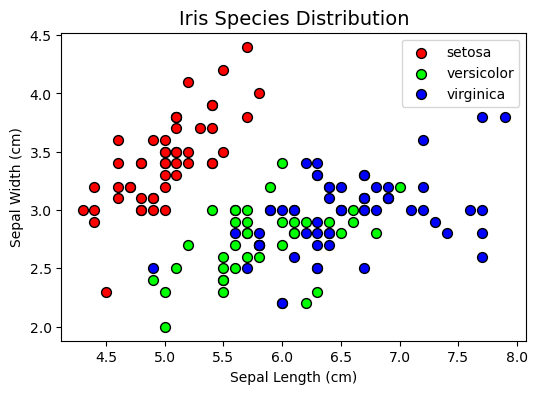

In [7]:
plt.figure(figsize=(6, 4))
colors = ["#FF0000", "#00FF00", "#0000FF"]
for i, (color, label) in enumerate(zip(colors, iris.target_names)):
    plt.scatter(
        X[y == i, 0],
        X[y == i, 1],
        color=color,
        label=label,
        edgecolors="k",
        s=50,
    )
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Iris Species Distribution", fontsize=14)
plt.legend()
plt.show()

## 2️⃣ Decision Tree Implementation

In [9]:
class SimpleDecisionTree:
    def __init__(self, max_depth=3):
        self.max_depth = max_depth

> **TODO**: Calculate Gini impurity <br>
> Gini Impurity measures node purity - lower values mean better splits:
> $$ G = 1 - \sum_{k=1}^K (p_k)^2 $$
> where:
> - $K$ = number of classes
> - $p_k$ = proportion of class $k$ in the node

In [11]:
class SimpleDecisionTree(SimpleDecisionTree):
    def _gini(self, y):
        """Calculate Gini impurity for a node"""
        # TODO: Calculate Gini impurity
        pass

> **TODO**: Iterate through features and possible thresholds <br>
> Find feature $j$ and threshold $t$ that minimize weighted impurity:
> $$ (j^*, t^*) = \arg\!\min_{j,t} \left[ \frac{N_{left}}{N}G_{left} + \frac{N_{right}}{N}G_{right} \right] $$
> where:
> - $N$ = total samples at current node
> - $N_{left/right}$ = samples in child nodes
> - $G_{left/right}$ = Gini of child nodes

In [13]:
class SimpleDecisionTree(SimpleDecisionTree): 
    def _best_split(self, X, y):
        """Find best feature and value to split on"""
        best_gini = float('inf')
        best_feature = None
        best_value = None
        
        # TODO: Iterate through features and possible thresholds
        # for feature in range(X.shape[1]):
        #     thresholds = np.unique(X[:, feature])
        #     for threshold in thresholds:
        #         left_idx = X[:, feature] <= threshold
        #         gini_left = ...
        #         gini_right = ...
        #         weighted_gini = (len(y[left_idx]) * gini_left + 
        #                         len(y[~left_idx]) * gini_right) / len(y)
                
        #         if weighted_gini < best_gini:
        #             best_gini = weighted_gini
        #             best_feature = feature
        #             best_value = threshold
        # return best_feature, best_value
        pass

> **TODO**: Implement recursive tree building <br>
> Stop recursion when either:
> 1. Tree reaches `max_depth`: $ depth \geq max\\_depth $
> 2. Node is pure: $ G = 0 $

In [15]:
class SimpleDecisionTree(SimpleDecisionTree): 
    def fit(self, X, y, depth=0):
        # TODO: Implement recursive tree building
        # if ... or len(np.unique(y)) == 1:
        #     self.label = np.bincount(y).argmax()
        #     return
        
        # self.feature, self.value = self._best_split(X, y)
        # left_idx = X[:, self.feature] <= self.value
        
        # self.left = SimpleDecisionTree(self.max_depth)
        # self.right = ...
        # self.left.fit(X[left_idx], y[left_idx], depth+1)
        # self.right.fit...
        pass

> **TODO**: Implement prediction
> Majority class at leaf node:
> $$ \hat{y} = \arg\!\max_k (N_k) $$
> where $N_k$ = count of class $k$ samples

In [17]:
class SimpleDecisionTree(SimpleDecisionTree): 
    def predict(self, X):
        # TODO: Implement prediction
        # if hasattr(self, 'label'):
        #     return np.full(X.shape[0], self.label)
        
        # left_idx = X[:, self.feature] <= self.value
        # preds = np.zeros(X.shape[0])
        # preds[left_idx] = self.left.predict(X[left_idx])
        # preds[~left_idx] = ...
        # return preds

### Training & Visualization

In [19]:
# Train our implementation
simple_tree = SimpleDecisionTree(max_depth=2)
simple_tree.fit(X_train, y_train)
simple_tree_preds = simple_tree.predict(X_test)

In [20]:
# Compare with scikit-learn
sk_tree = DecisionTreeClassifier(max_depth=2, random_state=42)
sk_tree.fit(X_train, y_train)
sk_tree_preds = sk_tree.predict(X_test)

In [21]:
print(f"🎯 Our Simple Tree Accuracy: {accuracy_score(y_test, simple_tree_preds):.4f}")
print(f"🎯 scikit-learn Accuracy: {accuracy_score(y_test, sk_tree_preds):.4f}")

🎯 Our Simple Tree Accuracy: 0.8000
🎯 scikit-learn Accuracy: 0.8000


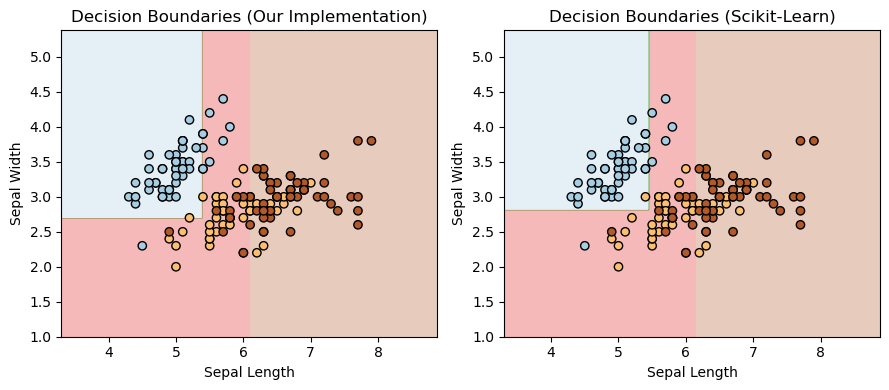

In [22]:
# Create mesh grid for visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Plot decision boundaries
plt.figure(figsize=(9, 4))

for i, (clf, title) in enumerate(zip(
    [simple_tree, sk_tree], 
    ['Our Implementation', 'Scikit-Learn']
)):
    plt.subplot(1, 2, i+1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.title(f"Decision Boundaries ({title})", fontsize=12)
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")

plt.tight_layout()
plt.show()

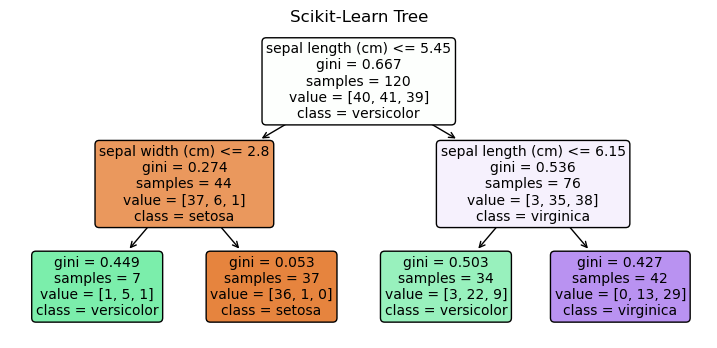

In [23]:
# Visualize scikit-learn tree structure
plt.figure(figsize=(9, 4))
plot_tree(sk_tree, 
         feature_names=iris.feature_names[:2],
         class_names=iris.target_names,
         filled=True, 
         rounded=True,
         fontsize=10)
plt.title("Scikit-Learn Tree", fontsize=12)
plt.show()

## 3️⃣ Random Forest Implementation

In [25]:
class SimpleRandomForest:
    def __init__(self, n_trees=10, max_depth=3, max_features=None, bootstrap=True):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.max_features = max_features
        self.bootstrap = bootstrap
        self.trees = []
        
    def _bootstrap_sample(self, X, y):
        """Create a bootstrap sample of the data"""
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        return X[indices], y[indices]
    
    def _select_features(self, X):
        """Select a random subset of features"""
        n_features = X.shape[1]
        if self.max_features is None:
            self.max_features = int(np.sqrt(n_features))
        
        features_idx = np.random.choice(n_features, 
                                        size=min(self.max_features, n_features), 
                                        replace=False)
        return features_idx
        
    def fit(self, X, y):
        """Fit random forest to training data"""
        self.trees = []
        
        for _ in range(self.n_trees):
            # Bootstrap sample if enabled
            if self.bootstrap:
                X_sample, y_sample = self._bootstrap_sample(X, y)
            else:
                X_sample, y_sample = X, y
                
            # Select random subset of features for this tree
            feature_idx = self._select_features(X_sample)
            X_subset = X_sample[:, feature_idx]
            
            # Train a decision tree
            tree = DecisionTreeClassifier(max_depth=self.max_depth)
            tree.fit(X_subset, y_sample)
            
            # Store tree and its feature indices
            self.trees.append((tree, feature_idx))
        
        return self
        
    def predict(self, X):
        """Make predictions with random forest"""
        # Collect predictions from all trees
        tree_preds = []
        for tree, feature_idx in self.trees:
            X_subset = X[:, feature_idx]
            pred = tree.predict(X_subset)
            tree_preds.append(pred)
            
        # Take majority vote
        tree_preds = np.array(tree_preds)
        forest_preds = np.zeros(X.shape[0], dtype=int)
        
        for i in range(X.shape[0]):
            forest_preds[i] = np.bincount(tree_preds[:, i]).argmax()
            
        return forest_preds

In [26]:
# Train our random forest
simple_rf = SimpleRandomForest(n_trees=10, max_depth=2)
simple_rf.fit(X_train, y_train)
rf_preds = simple_rf.predict(X_test)

In [27]:
# Train scikit-learn's random forest
sk_rf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42)
sk_rf.fit(X_train, y_train)
sk_rf_preds = sk_rf.predict(X_test)

In [28]:
# Compare accuracies
print(f"🎯 Our Random Forest Accuracy: {accuracy_score(y_test, rf_preds):.4f}")
print(f"🎯 Scikit-Learn RF Accuracy: {accuracy_score(y_test, sk_rf_preds):.4f}")

🎯 Our Random Forest Accuracy: 0.6667
🎯 Scikit-Learn RF Accuracy: 0.8667


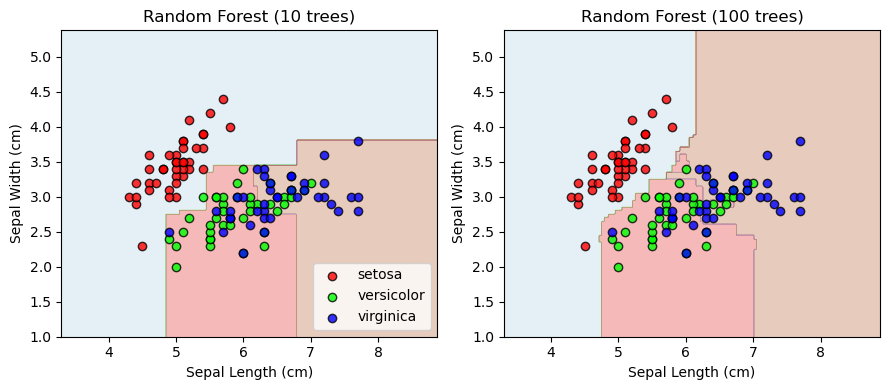

In [29]:
plt.figure(figsize=(9, 4))
titles = ['Random Forest (10 trees)', 'Random Forest (100 trees)']

# Create a more complex random forest for comparison
sk_rf_complex = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
sk_rf_complex.fit(X_train, y_train)

for i, (clf, title) in enumerate(zip(
    [sk_rf, sk_rf_complex], titles
)):
    plt.subplot(1, 2, i+1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    
    # Plot training points
    for class_val, color in zip(range(3), colors):
        idx = y_train == class_val
        plt.scatter(X_train[idx, 0], X_train[idx, 1], 
                   c=color, label=iris.target_names[class_val],
                   edgecolors='k', alpha=0.8)
    
    plt.title(f"{title}", fontsize=12)
    plt.xlabel("Sepal Length (cm)")
    plt.ylabel("Sepal Width (cm)")
    if i == 0:  # Only show legend for first plot
        plt.legend(loc="lower right")

plt.tight_layout()
plt.show()